In [162]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
import statsmodels.stats.weightstats as ssw
%matplotlib inline

In [13]:
lamb = .1

In [14]:
ex = sts.expon(scale = 1/lamb)

sample =ex.rvs(size= 200)

In [15]:
sample_mean = np.mean(sample)

sample_mean

9.647606586616792

In [16]:
sample_var = np.var(sample)

sample_var

82.48758446633569

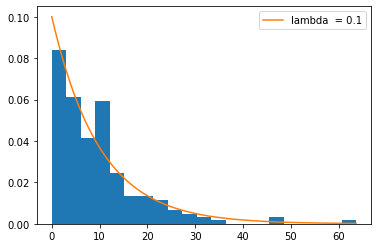

In [17]:
plt.hist(sample, bins='auto', density=True)
x = np.linspace(0,np.max(sample),200)

plt.plot(x, ex.pdf(x), label = f'lambda  = {lamb}')


plt.legend()

In [18]:
ex.ppf(0.025)

0.25317807984289875

In [19]:
ex.ppf(1-0.025)

36.888794541139355

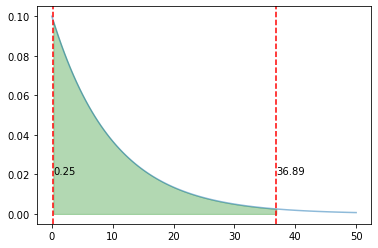

In [39]:
alp = 0.05
x = np.linspace(0,50,100)
pdf = ex.pdf(x)
plt.plot(x, pdf, label='теоретическая плотность', alpha=0.5)
plt.plot()
plt.axvline(ex.ppf(alp/2), color = 'red', ls = '--')
plt.axvline(ex.ppf(1-alp/2), color = 'red', ls = '--')
to_fill = np.linspace(ex.ppf(alp/2), ex.ppf(1-alp/2), 100)
plt.fill_between(to_fill, ex.pdf(to_fill), alpha=0.3, color='green')
plt.text(ex.ppf(alp/2),0.02, round(ex.ppf(alp/2),2))
plt.text(ex.ppf(1-alp/2),0.02, round(ex.ppf(1-alp/2),2))
plt.show()

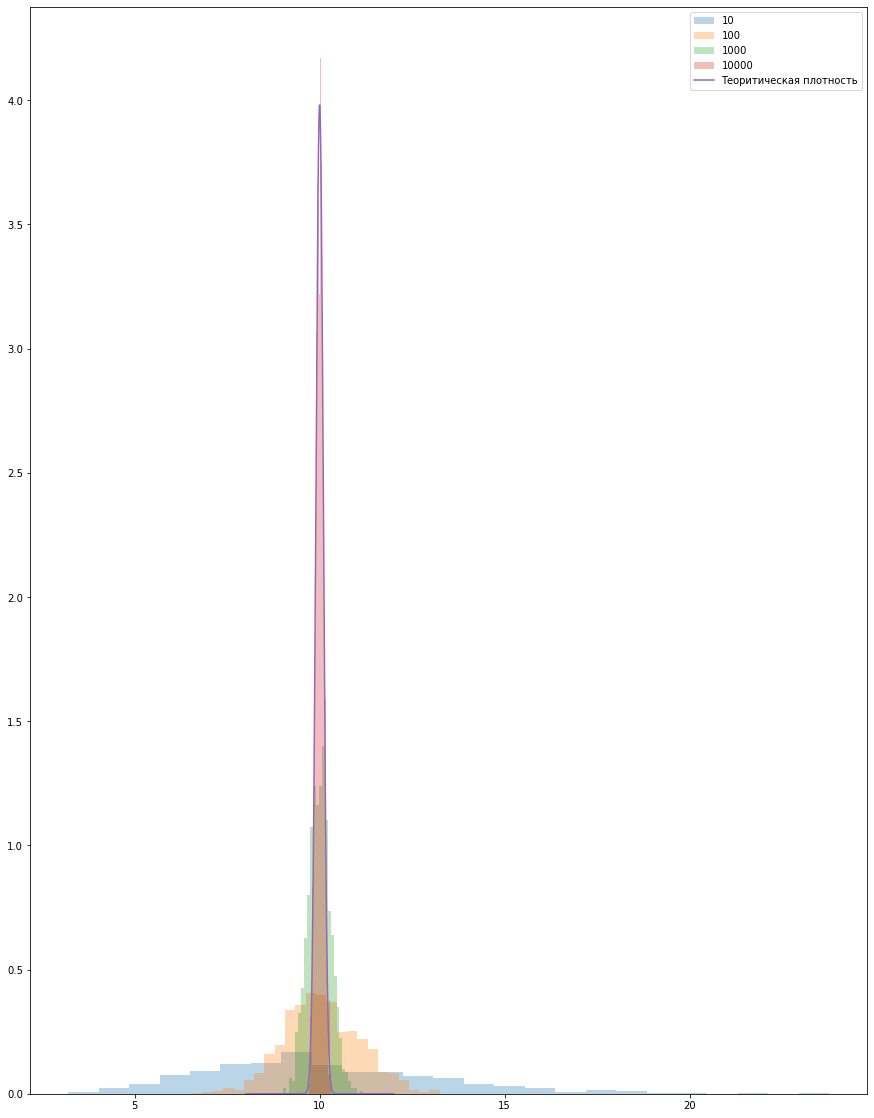

In [103]:
plt.figure(figsize=(15,20))

norm_rv = sts.norm(loc = ex.mean(), scale = ex.std()/np.sqrt(N))

for N in [10, 100, 1000, 10000]:
    means = []
    for i in range (1000):
        means.append(np.mean(ex.rvs(N)))
    plt.hist(means, density = True, bins = 'auto' ,alpha = .3, label = N)

x = np.linspace(8,12,300)
pdf = norm_rv.pdf(x)
plt.plot(x, pdf, label = 'Теоритическая плотность')

plt.legend()
plt.show()


При увеличении объема выборки распределение средней приближается к нормальному распределению.

In [107]:
df=pd.read_csv('telecom_churn.csv')
df

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,...,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,...,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,...,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,...,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

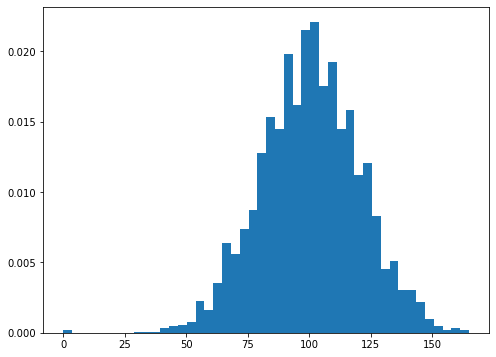

In [145]:
plt.figure(figsize=(8,6))
plt.hist(df['total day calls'], bins = 'auto', density=True)

plt.show()

In [113]:
import seaborn as sns

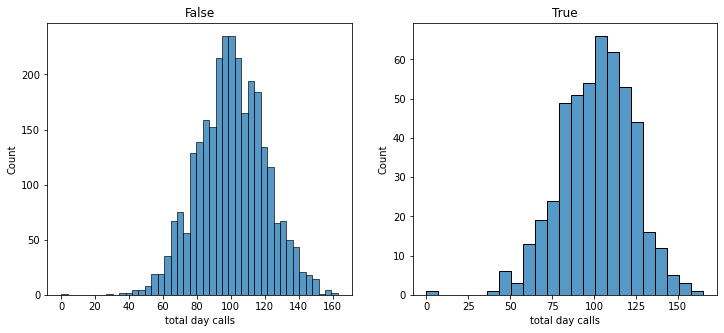

In [149]:
fig , ax = plt.subplots(1,2)
ax1,ax2 = ax.flatten()
fig.set_size_inches(12,5)
sns.histplot(
    data = df,
    x = df.query('churn == False')['total day calls'],
    ax = ax1,

)
ax1.set_title('False')
sns.histplot(
    data = df,
    x = df.query('churn == True')['total day calls'],
    ax = ax2
)
ax2.set_title('True')
plt.show()

In [150]:
sample_tr = df.query('churn == True')['total day calls'].values

sample_fal = df.query('churn == False')['total day calls'].values

In [173]:
def CI(sample):

    print("Доверительный интервал для среднего: [{}, {}] ".format(
        np.mean(sample) - 1.96 * np.std(sample, ddof = 1) / np.sqrt(sample.shape[0]), np.mean(sample) + 1.96 * np.std(sample, ddof = 1) / np.sqrt(sample.shape[0]) 
    ))

    print("Доверительный интервал для среднего методом _zconfint_generic: {} ".format(
        ssw._zconfint_generic(np.mean(sample),  np.std(sample, ddof=1), alpha=0.95, alternative='two-sided')
    ))

In [174]:
CI(sample_tr)

Доверительный интервал для среднего: [99.41062692289533, 103.26018053052083] 
Доверительный интервал для среднего методом _zconfint_generic: (99.98204678079553, 102.68876067262063) 


In [175]:
CI(sample_fal)

Доверительный интервал для среднего: [99.55617497470149, 101.0101408147722] 
Доверительный интервал для среднего методом _zconfint_generic: (99.04149114274126, 101.52482464673243) 


In [181]:
df_gr = df.groupby('churn')['total day calls'].agg(['mean', 'std','count', 'sem'])

In [243]:
alpha = .05

df_gr['step'] = sts.norm.ppf(1 - alpha/2)*df_gr['sem']

df_gr = df_gr.assign(z_conf_min = df_gr.apply(lambda x: ssw._zconfint_generic(x['mean'],  x['std'] , alpha=0.95, alternative='two-sided')[0], axis=1),
             z_conf_max = df_gr.apply(lambda x: ssw._zconfint_generic(x['mean'],  x['std'] , alpha=0.95, alternative='two-sided')[1], axis=1))


df_gr = df_gr.assign(CI_min =  df_gr.apply(lambda x: x['mean'] - x['step'], axis=1),
             CI_max = df_gr.apply(lambda x: x['mean'] + x['step'], axis=1))


df_gr[['mean','CI_min', 'z_conf_min', 'CI_max', 'z_conf_max']]

,mean,CI_min,z_conf_min,CI_max,z_conf_max
churn,,,,,
False,100.283158,99.556188,99.041491,101.010127,101.524825
True,101.335404,99.410662,99.982047,103.260145,102.688761


Результаты, полученные разными методами, +/- совпадают.

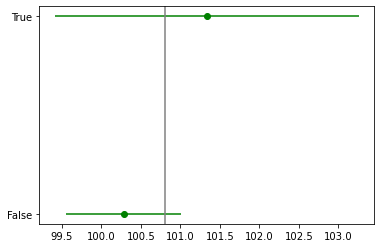

In [241]:
###Доверительный интервал, расчитанный вручную
plt.errorbar(
df_gr['mean'].values,
np.arange(df_gr['mean'].size),
    xerr = df_gr['step'],
    capsize= 0,
    fmt = 'o',
    color = 'green'
)

plt.yticks(np.arange(df_gr['mean'].size),[False,True])

plt.axvline(df_gr['mean'].mean(),0, color = 'grey')
plt.show()

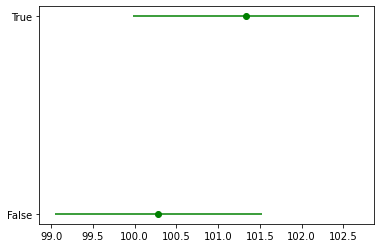

In [242]:
###Доверительный интервал методом z-conf

plt.errorbar(
df_gr['mean'].values,
np.arange(df_gr['mean'].size),
xerr = df_gr['mean'] - df_gr['z_conf_min'],
capsize= 0,
fmt = 'o',
color = 'green')

plt.yticks(np.arange(df_gr['mean'].size),[False,True])

plt.show()